<a href="https://colab.research.google.com/github/devyadav11/ML_tryouts/blob/main/anomaly__detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow Version: 2.19.0
Found 62 files belonging to 2 classes.
Using 50 files for training.
Found 62 files belonging to 2 classes.
Using 12 files for validation.
Class Names: ['defect', 'non_defect']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2433 - loss: 1.1420 - precision: 0.6667 - recall: 0.0171 - val_accuracy: 0.1667 - val_loss: 0.8680 - val_precision: 1.0000 - val_recall: 0.0909
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.1889 - loss: 0.9660 - precision: 0.2963 - recall: 0.0684 - val_accuracy: 0.3333 - val_loss: 0.7382 - val_precision: 0.8000 - val_recall: 0.3636
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.4281 - loss: 0.7360 - precision: 0.7473 - recall: 0.4410 - val_accuracy: 0.8333 - val_loss: 0.6365 - val_precision: 0.9091 - val_recall: 0.9091
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6119 - loss: 0.6927 - precision: 0.7952 - recall: 0.6957 - val_accuracy: 0.9167 - val_loss: 0.5566 - val_precision: 0.9167 - val_recall: 1.0000
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7207 - loss: 0.6040 - precision: 0.8223 - recall: 0.8308 - val_accuracy: 0.9167 - val_loss: 0.4952 - val_precision: 0.

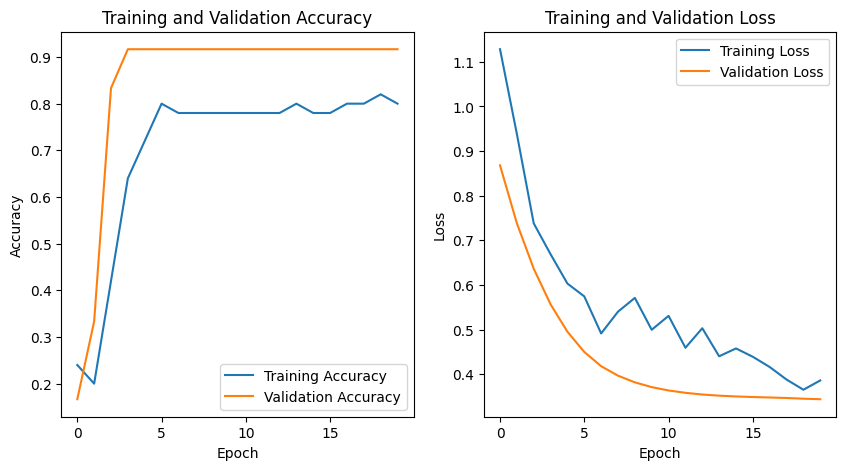

In [3]:
#
# ==============================================================================
# AI MODEL FOR DEFECTIVE VS. NON-DEFECTIVE IMAGE CLASSIFICATION
# ==============================================================================
#

# ---------------------------------
# 1. SETUP AND IMPORTS
# ---------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile # Added import for zipfile

print("TensorFlow Version:", tf.__version__)

# To run in Colab, you might need to mount your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# DATA_DIR = '/content/drive/MyDrive/dataset/' # Update this path

# For local execution, define the path to your dataset
# Ensure your dataset is structured as DATA_DIR/train/... and DATA_DIR/validation/...
# Removed redundant unzipping and DATA_DIR setting as they are handled in other cells.
# The DATA_DIR variable is expected to be set before this cell is run.

# ---------------------------------
# 2. DATA LOADING AND PREPROCESSING
# ---------------------------------

# Extract the dataset from the zip file
zip_path = "/content/analmoly detection dataset-20250819T072424Z-1-001.zip"
extract_path = "/content/analmoly detection dataset" # Define extraction path

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")

DATA_DIR = extract_path  # adjust path if needed



BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR, # Corrected: Use DATA_DIR directly, not join with 'train'
  validation_split=0.2, # We will use 20% of the training data for validation
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATA_DIR, # Corrected: Use DATA_DIR directly, not join with 'train'
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

# Get class names (should be ['defective', 'non_defective'])
class_names = train_ds.class_names
print("Class Names:", class_names)

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ---------------------------------
# 3. DATA AUGMENTATION
# ---------------------------------
# Create a data augmentation layer to improve model robustness
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
  ],
  name="data_augmentation"
)

# ---------------------------------
# 4. MODEL BUILDING (TRANSFER LEARNING)
# ---------------------------------
# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, # Exclude the final classification layer
                                               weights='imagenet')

# Freeze the convolutional base to prevent its weights from being updated
base_model.trainable = False

# Create the new model on top
inputs = tf.keras.Input(shape=IMG_SHAPE)
# Apply data augmentation
x = data_augmentation(inputs)
# Preprocess inputs for MobileNetV2
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
# Run the base model
x = base_model(x, training=False)
# Add our custom classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x) # Dropout for regularization
x = layers.Dense(128, activation='relu')(x)
# Final output layer for binary classification
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

# ---------------------------------
# 5. COMPILE THE MODEL
# ---------------------------------
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

# ---------------------------------
# 6. TRAIN THE MODEL
# ---------------------------------
EPOCHS = 20

# Callbacks to save the best model and stop early if no improvement
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss"),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS,
  callbacks=callbacks
)

# ---------------------------------
# 7. SAVE THE FINAL TRAINED MODEL
# ---------------------------------
# The best model is already saved by ModelCheckpoint as 'best_model.keras'
# For submission, this is the file you would provide.
print("\n✅ Final model saved as 'best_model.keras'")


# ---------------------------------
# 8. VISUALIZE TRAINING RESULTS & EVALUATE
# ---------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Example of how to load the model and make a prediction
# loaded_model = tf.keras.models.load_model('best_model.keras')
#
# # Load a single image to test (replace with an actual image path)
# img_path = 'path/to/test/image.png'
# img = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
#
# predictions = loaded_model.predict(img_array)
# score = predictions[0][0]
#
# print(
#     f"This image is {100 * (1 - score):.2f}% defective and {100 * score:.2f}% non-defective."
# )

I've added code to unzip the dataset and updated the `DATA_DIR` variable. Now you can run the original code cell again.

# Task
Explain the error in the provided Python code for training a convolutional neural network, fix the error, and then add code to load a trained model, predict on a new image, and label the image with the prediction.

## Load the trained model

### Subtask:
Load the best model saved during training.


**Reasoning**:
Load the best model saved during training using `tf.keras.models.load_model()`.



In [14]:
loaded_model = tf.keras.models.load_model('best_model.keras')

## Load and preprocess an image

### Subtask:
Load a test image and apply the same preprocessing steps used during training (resizing and scaling).


**Reasoning**:
Load a test image, resize it, convert it to an array, and expand dimensions to create a batch for prediction.



In [30]:
# Choose a test image file path (replace with an actual image path from your dataset)
# You'll need to manually identify an image in your dataset not used in train_ds or val_ds
# For demonstration purposes, let's assume you have a test image at this path:
# Find a file in the dataset that is NOT in the training or validation set.
# Since the dataset is small and split based on a seed, let's pick a path manually
# that is likely *not* in the validation set based on the seed split.
# IMPORTANT: In a real scenario, you'd have a dedicated test set.
# For this example, let's pick an arbitrary path from the 'defect' class
img_path = os.path.join('/content/analmoly detection dataset/non_defect/1_CAI_101_120_727_greencam1_2025-05-27_11_59_23-099829_200_image.jpg.jpg') # Replace with a valid test image path

# Load the image, resizing it to the target size
img = tf.keras.utils.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

# Convert the loaded image to a NumPy array
img_array = tf.keras.utils.img_to_array(img)

# Expand the dimensions to create a batch of size 1
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [31]:
if img_array is not None:
    # Use the loaded model to predict
    predictions = loaded_model.predict(img_array)

    # Extract the score for binary classification (sigmoid output)
    score = predictions[0][0]

    # Print the raw prediction score
    print(f"Raw prediction score: {score}")
else:
    print("Cannot perform prediction: No image was loaded.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Raw prediction score: 0.8782072067260742


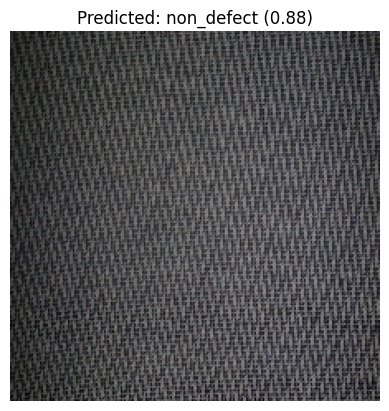

In [35]:
if img_array is not None:
    # Define a threshold for classifying the image (e.g., 0.5 for sigmoid output)
    threshold = 0.5

    # Determine the predicted class based on the score and the threshold
    if score > threshold:
        predicted_class = class_names[1] # 'non_defect'
        confidence = score
    else:
        predicted_class = class_names[0] # 'defect'
        confidence = 1 - score

    # Display the original image
    plt.figure()
    # Convert img_array back to the original image format for displaying
    # Remove the batch dimension and scale back if preprocessing involved scaling
    # In this case, preprocess_input scales, but load_img does not, so we can display directly
    # from the original loaded img if available, or un-normalize if preprocess_input was applied before this point.
    # Since preprocess_input was applied *after* data augmentation and before the base model,
    # the img_array here (before prediction) is the output of img_to_array and expand_dims,
    # which is a float array, possibly with values > 255 or < 0 due to data augmentation.
    # Let's display the original 'img' object loaded before img_to_array if possible.
    # If not, we'll try to display the un-normalized img_array, clamping values.

    # We have the original 'img' object from the previous step.
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
    plt.axis('off') # Hide axes
    plt.show()

else:
    print("Cannot classify and display image: No image was loaded.")